# TRABAJO INTEGRADOR - PROCESAMIENTO DIGITAL DE IM√ÅGEN

## Ejercicio 1: Espacios de Color

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado
OpenCV carga las im√°genes en formato BGR (Blue-Green-Red) por defecto, en vez de RGB como otras librer√≠as. Lo primero ser√° importar las librer√≠as necesarias, cargar la imagen y mostrar los canales por separado.

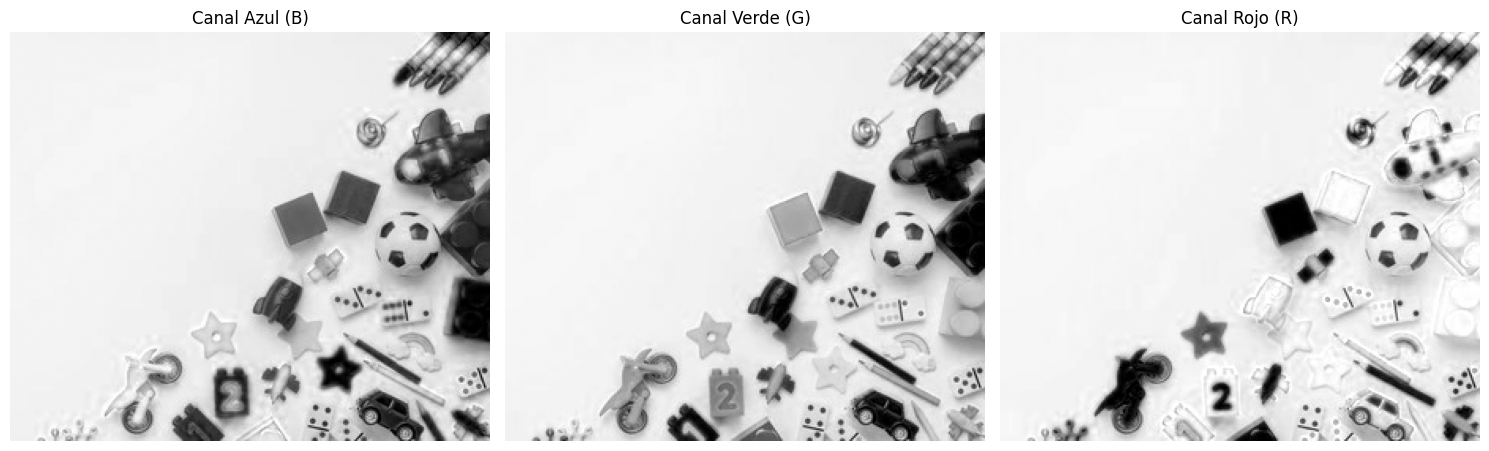

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en BGR
imagen_bgr = cv2.imread('/content/drive/MyDrive/Procesamiento/toys.jpg')

# Separar canales B, G y R
B, G, R = cv2.split(imagen_bgr)

# Mostrar los canales por separado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(B, cmap='gray')
axs[0].set_title('Canal Azul (B)')
axs[1].imshow(G, cmap='gray')
axs[1].set_title('Canal Verde (G)')
axs[2].imshow(R, cmap='gray')
axs[2].set_title('Canal Rojo (R)')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


Explicaci√≥n:
cv2.imread: Carga la imagen en formato BGR.

cv2.split: Separa la imagen en sus 3 canales.

matplotlib.pyplot.imshow: Usamos esta funci√≥n para mostrar cada canal como imagen en escala de grises.

cmap='gray': As√≠ visualizamos los canales en escala de intensidad, lo que es √∫til para an√°lisis.

¬øPor qu√© se hace esto?

Separar los canales nos permite ver c√≥mo cada componente de color contribuye a la imagen total. Como cada canal es una matriz de intensidades, visualizarlos en escala de grises muestra su distribuci√≥n.

##b) Identificar el canal con mayor informaci√≥n usando el promedio de intensidades

Vamos a calcular el promedio de cada canal. Un valor m√°s alto podr√≠a indicar que ese canal domina en la imagen.

In [22]:
prom_B = np.mean(B)
prom_G = np.mean(G)
prom_R = np.mean(R)

print(f"Promedio Azul (B): {prom_B:.2f}")
print(f"Promedio Verde (G): {prom_G:.2f}")
print(f"Promedio Rojo (R): {prom_R:.2f}")


Promedio Azul (B): 206.35
Promedio Verde (G): 210.95
Promedio Rojo (R): 224.56


Explicaci√≥n:
El promedio indica qu√© tan ‚Äúbrillante‚Äù es cada canal en promedio. El canal con el valor m√°s alto tiene mayor informaci√≥n luminosa en esta imagen.

##c) Convertir de BGR a RGB y mostrar por qu√© cambia la visualizaci√≥n

Cuando usamos cv2.imread, la imagen est√° en BGR. matplotlib.pyplot.imshow() espera RGB, por eso se ve mal si no convertimos.

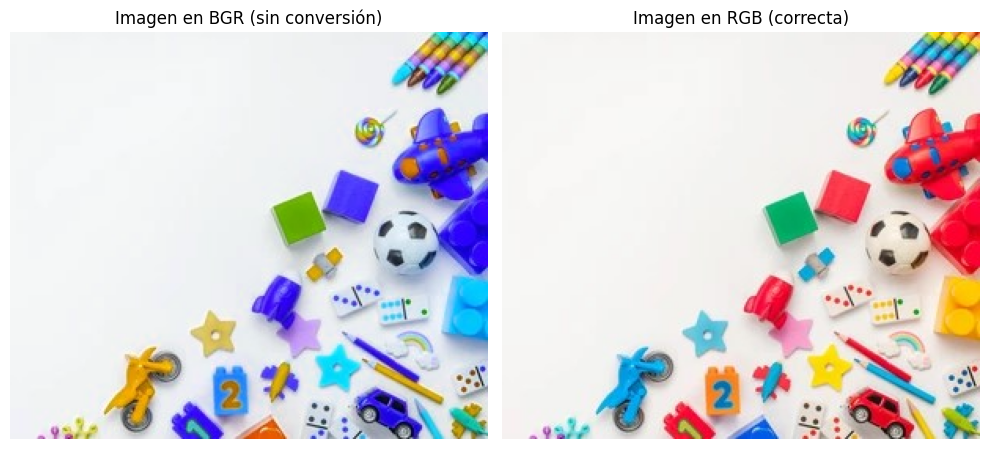

In [23]:
# Convertir BGR a RGB
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Mostrar ambas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_bgr)  # Se ver√° con colores alterados
plt.title('Imagen en BGR (sin conversi√≥n)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb)  # Correcto
plt.title('Imagen en RGB (correcta)')
plt.axis('off')

plt.tight_layout()
plt.show()


¬øPor qu√© se ven diferentes?

Matplotlib espera que el orden de los canales sea RGB, as√≠ que si mostramos una imagen BGR, los colores quedan mezclados (azules en lugar de rojos, etc.).

##Ejercicio 2: Muestreo y Cuantizaci√≥n

a) Aplicar MUESTREO ESPACIAL (Dowsampling) con factores de 2, 4 y 8

El muestreo espacial consiste en reducir la resoluci√≥n de una imagen. En Python con OpenCV, podemos hacerlo con cv2.resize() usando un factor de escala.

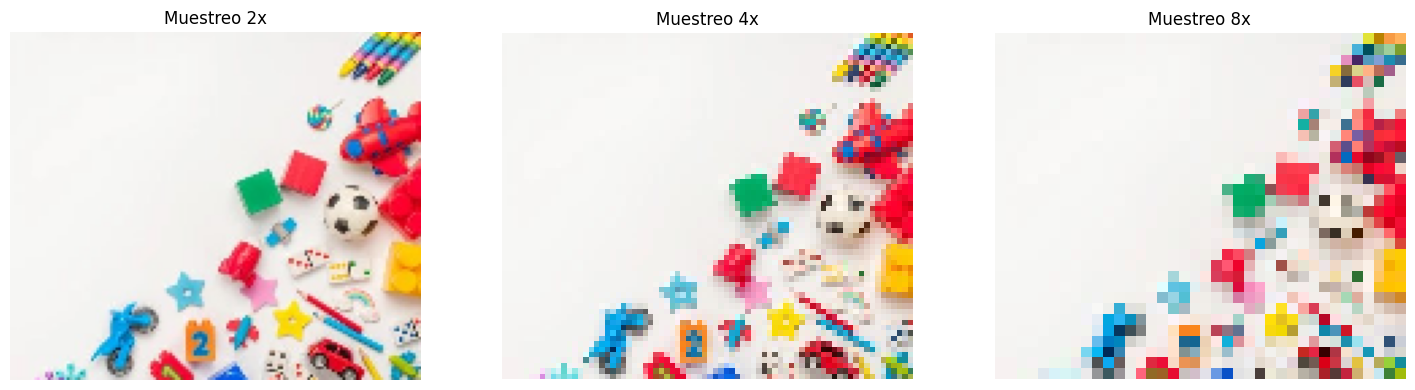

In [26]:

# Funci√≥n para aplicar muestreo espacial
def muestreo_espacial(imagen, factor):
    """
    Reduce el tama√±o de una imagen dividiendo su ancho y alto por el factor dado.
    Usa interpolaci√≥n 'vecino m√°s cercano' para mantener los colores originales sin suavizado.
    """
    alto, ancho = imagen.shape[:2]
    nueva_img = cv2.resize(imagen, (ancho // factor, alto // factor), interpolation=cv2.INTER_NEAREST)
    return nueva_img

# Aplicamos la funci√≥n a distintos factores de muestreo
muestreo_2 = muestreo_espacial(imagen_rgb, 2)
muestreo_4 = muestreo_espacial(imagen_rgb, 4)
muestreo_8 = muestreo_espacial(imagen_rgb, 8)

# Visualizamos los resultados
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, (muestreo, factor) in enumerate(zip([muestreo_2, muestreo_4, muestreo_8], [2, 4, 8])):
    axs[i].imshow(muestreo)
    axs[i].set_title(f"Muestreo {factor}x")
    axs[i].axis('off')
plt.show()


¬øPor qu√© usamos cv2.resize()?

Porque permite cambiar el tama√±o de la imagen con diferentes m√©todos de interpolaci√≥n.

INTER_NEAREST es el m√°s b√°sico y r√°pido: copia el p√≠xel m√°s cercano (no suaviza).

Ventaja: m√°s real para ver efectos de muestreo.

Alternativas: INTER_LINEAR (suaviza un poco), INTER_AREA (bueno para reducir).

Ac√° cre√© una funci√≥n muestreo_espacial() que toma una imagen y un factor de reducci√≥n. La funci√≥n utiliza cv2.resize() con interpolaci√≥n INTER_NEAREST, que es la m√°s simple y r√°pida. Esto permite visualizar c√≥mo se pierden detalles al reducir resoluci√≥n, sin que se suavicen los colores como lo har√≠a INTER_LINEAR.

Despu√©s, aplico esa funci√≥n con factores 2, 4 y 8 para mostrar c√≥mo va cambiando la imagen. Y finalmente muestro todas en una grilla usando matplotlib, lo que permite comparar visualmente el efecto del muestreo.

##C√°lculo de Reducci√≥n

Queremos saber cu√°nto tama√±o se reduce en cada caso.

In [30]:
def calcular_reduccion(original, reducida):
    alto_o, ancho_o = original.shape[:2]
    alto_r, ancho_r = reducida.shape[:2]
    total_original = alto_o * ancho_o
    total_reducido = alto_r * ancho_r
    porcentaje = 100 * (1 - total_reducido / total_original)
    return (alto_r, ancho_r), porcentaje

# Mostrar reducci√≥n para cada factor
factores = [2, 4, 8]
muestreadas = [muestreo_2, muestreo_4, muestreo_8]

for factor, img_m in zip(factores, muestreadas):
    nuevo_tam, reduccion = calcular_reduccion(imagen_rgb, img_m)
    print(f"Muestreo {factor}x ‚Üí Tama√±o nuevo: {nuevo_tam}, Reducci√≥n: {reduccion:.2f}%")


Muestreo 2x ‚Üí Tama√±o nuevo: (129, 152), Reducci√≥n: 75.10%
Muestreo 4x ‚Üí Tama√±o nuevo: (64, 76), Reducci√≥n: 93.82%
Muestreo 8x ‚Üí Tama√±o nuevo: (32, 38), Reducci√≥n: 98.46%


##c) Aplicar cuantizaci√≥n con 4 niveles: 32, 64, 128, 256
La cuantizaci√≥n reduce la cantidad de niveles de color. En im√°genes, esto significa limitar los valores posibles de cada canal.

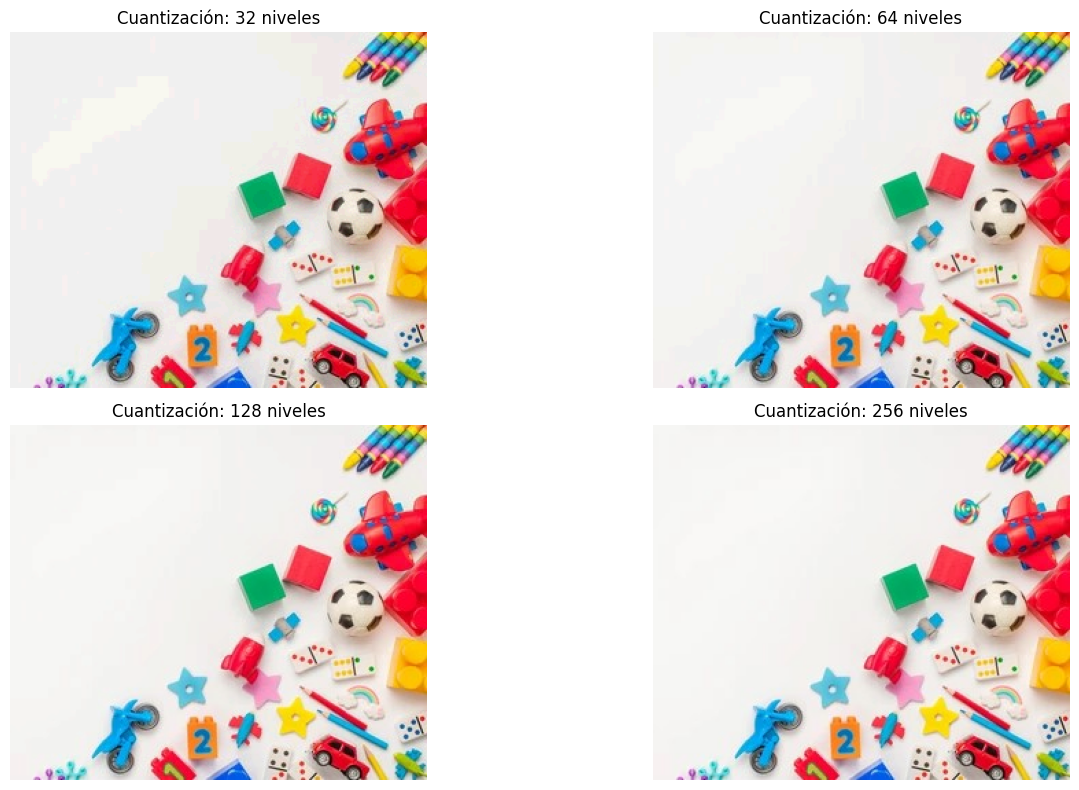

In [29]:
# Cuantizaci√≥n de una imagen RGB
def quantize_image(image, levels):
    step = 256 // levels
    quantized = (image // step) * step
    return quantized.astype(np.uint8)

levels = [32, 64, 128, 256]
quantized_images = [quantize_image(img_rgb, lvl) for lvl in levels]

# Mostrar
plt.figure(figsize=(15, 8))
for i, lvl in enumerate(levels):
    plt.subplot(2, 2, i+1)
    plt.imshow(quantized_images[i])
    plt.title(f"Cuantizaci√≥n: {lvl} niveles")
    plt.axis("off")

plt.tight_layout()
plt.show()


Explicaci√≥n:
Cuantizamos dividiendo cada valor de p√≠xel y luego multiplic√°ndolo para que caiga en un "rango fijo".

256 // levels: define el tama√±o del paso entre niveles.

image // step * step: redondea hacia abajo al m√∫ltiplo m√°s cercano de ese paso.

##d) ¬øEn qu√© nivel se nota la degradaci√≥n?
Esta respuesta es subjetiva y depende del contenido. Para esta imagen con muchos colores brillantes, notar√°s:

A partir de 32 o 64 niveles ya empieza a verse la p√©rdida de detalle y bandas de color.

En 128 y 256 se mantiene bastante bien visualmente.

##Ejercicio 3: Segmentaci√≥n por Color
a) Extraer objetos de un color espec√≠fico usando umbrales RGB
Vamos a segmentar por color. Supongamos que queremos detectar los objetos rojos (hay varios juguetes de ese color en la imagen).

Usamos cv2.inRange() para definir un rango de color (umbral) y obtener una m√°scara binaria donde se marca lo que est√° dentro del rango.

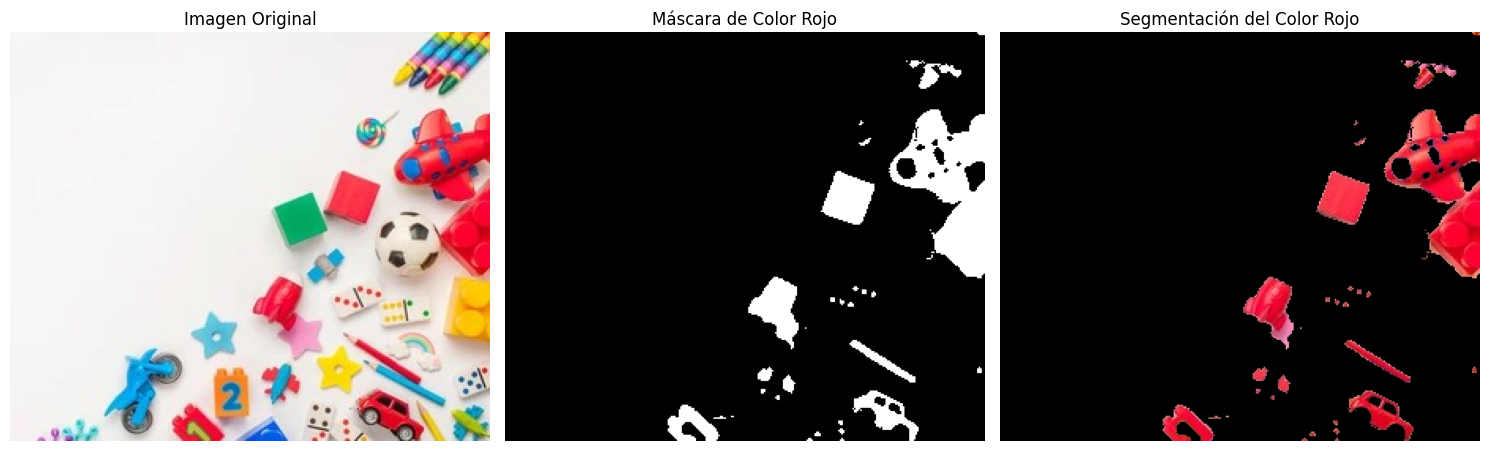

In [31]:
# Convertir la imagen de RGB a formato HSV para segmentar mejor
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Definir el rango para el color rojo (en HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

# M√°scara combinando los dos rangos (rojo est√° al inicio y final del c√≠rculo HSV)
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask1, mask2)

# Aplicar la m√°scara a la imagen original
segmented = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

# Mostrar
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_red, cmap='gray')
plt.title("M√°scara de Color Rojo")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented)
plt.title("Segmentaci√≥n del Color Rojo")
plt.axis('off')

plt.tight_layout()
plt.show()


Explicaci√≥n:

Trabajamos en HSV (Hue, Saturation, Value) porque separar colores es m√°s f√°cil ah√≠.

El rojo es especial: aparece en dos zonas del c√≠rculo de color, por eso usamos dos rangos y los combinamos.

La m√°scara es una imagen en blanco y negro donde blanco = color detectado.

##b) Calcular y mostrar el histograma en escala de grises
Primero convertimos a escala de grises y luego graficamos el histograma.

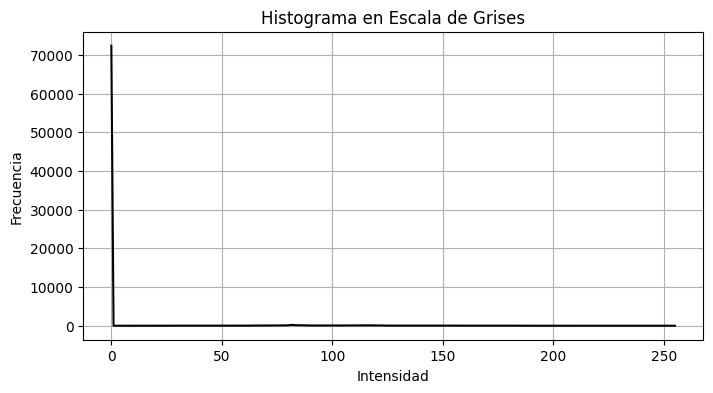

In [32]:
# Convertimos la imagen segmentada a escala de grises
gray = cv2.cvtColor(segmented, cv2.COLOR_RGB2GRAY)

# Calcular histograma
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Mostrar histograma
plt.figure(figsize=(8, 4))
plt.plot(hist, color='black')
plt.title("Histograma en Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


¬øQu√© est√° pasando?

La imagen segmented que est√°s convirtiendo a escala de grises contiene mucho negro (valor 0), porque solo deja pasar los p√≠xeles del color rojo detectado. El resto est√° en negro (0,0,0). Al convertir eso a escala de grises, se queda como valor 0, que se acumula fuertemente en el histograma.

Por eso:

Valor 0 tiene frecuencia alt√≠sima.

El resto de los valores tiene muy poca presencia.

Opci√≥n 1:

Calcular histograma solo de los p√≠xeles "segmentados"

En vez de graficar todo, solo tom√°s los p√≠xeles donde la m√°scara detect√≥ rojo (m√°scara > 0):

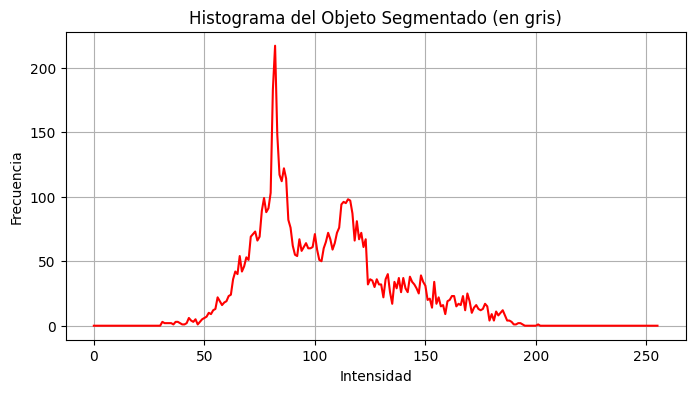

In [36]:
# Extraer los valores de gris donde la m√°scara es distinta de cero
valores_segmentados = gray[mask_red > 0]

# Calcular histograma solo con esos valores
hist = cv2.calcHist([valores_segmentados], [0], None, [256], [0, 256])

# Mostrar
plt.figure(figsize=(8, 4))
plt.plot(hist, color='red')
plt.title("Histograma del Objeto Segmentado (en gris)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


Opci√≥n 2:

Mostrar histograma en log escala

Esto puede ayudarte a visualizar tambi√©n los valores bajos cuando hay un pico dominante:

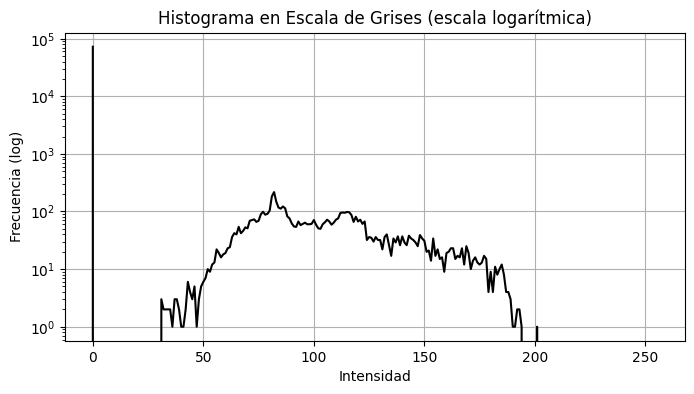

In [35]:
plt.figure(figsize=(8, 4))
plt.semilogy(hist, color='black')  # Escala logar√≠tmica
plt.title("Histograma en Escala de Grises (escala logar√≠tmica)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia (log)")
plt.grid(True)
plt.show()


##Conclusi√≥n: An√°lisis del Histograma de la Imagen Segmentada

Al segmentar objetos por color (en este caso, objetos rojos) y luego calcular su histograma en escala de grises, se presentan dos formas complementarias de an√°lisis:

Opci√≥n 1 ‚Äì Histograma del Objeto Segmentado (sin fondo)
En esta opci√≥n se calcula el histograma solo de los p√≠xeles correspondientes al objeto segmentado, es decir, aquellos donde la m√°scara es diferente de cero.

üîç Ventajas:

El histograma muestra con claridad la distribuci√≥n real de intensidades del objeto segmentado.

Podemos observar qu√© niveles de gris predominan en el objeto.

Se eliminan los valores del fondo (negros), que distorsionaban el an√°lisis.

üìå Conclusi√≥n:

Esta opci√≥n permite un an√°lisis m√°s preciso del objeto, ideal para tareas de reconocimiento o clasificaci√≥n de colores segmentados.

Opci√≥n 2 ‚Äì Histograma Completo en Escala Logar√≠tmica
Aqu√≠ se muestra el histograma de toda la imagen segmentada, incluyendo el fondo negro, pero usando una escala logar√≠tmica en el eje Y.

üîç Ventajas:

Aunque el fondo negro (intensidad 0) domina en cantidad, la escala logar√≠tmica permite visualizar tambi√©n las intensidades menos frecuentes.

Sirve para detectar la presencia de m√∫ltiples regiones con diferentes niveles de gris, sin que un pico distorsione la vista global.

üìå Conclusi√≥n:

Esta visualizaci√≥n es √∫til cuando no se quiere perder ninguna informaci√≥n del conjunto total, aunque la imagen est√© dominada por una intensidad espec√≠fica.



##En resumen, si nuestro objetivo es estudiar √∫nicamente el objeto segmentado, es m√°s √∫til eliminar el fondo y analizar su histograma directamente. En cambio, si queremos ver c√≥mo se distribuyen todas las intensidades en la imagen segmentada, sin perder detalle por picos dominantes, la escala logar√≠tmica es una excelente herramienta visual.

##c) Coordenadas del rect√°ngulo que encierra el objeto segmentado
Usamos cv2.findContours para detectar formas, luego el bounding box m√°s simple.

In [33]:
# Encontrar contornos en la m√°scara
contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar el bounding box m√°s grande (por √°rea)
if contours:
    biggest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(biggest)
    print(f"Coordenadas del rect√°ngulo: x={x}, y={y}, ancho={w}, alto={h}")


Coordenadas del rect√°ngulo: x=243, y=49, ancho=61, alto=107


Explicaci√≥n:

cv2.boundingRect: Devuelve (x, y, ancho, alto) del rect√°ngulo que encierra el objeto.

Muy √∫til para hacer detecci√≥n de objetos o preparar datos para IA.

##d) Dibujar los bordes del objeto segmentado en rojo
Vamos a superponer los contornos sobre la imagen original.

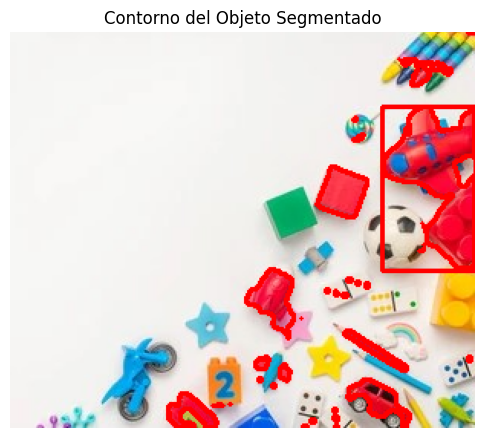

In [34]:
# Dibujar contornos sobre una copia de la imagen original
img_contornos = img_rgb.copy()
cv2.drawContours(img_contornos, contours, -1, (255, 0, 0), 2)  # Azul en RGB

# Tambi√©n dibujar el rect√°ngulo m√°s grande
cv2.rectangle(img_contornos, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Mostrar resultado
plt.figure(figsize=(6, 6))
plt.imshow(img_contornos)
plt.title("Contorno del Objeto Segmentado")
plt.axis('off')
plt.show()


Explicaci√≥n:

drawContours: Traza las l√≠neas exteriores de los objetos detectados.

(255, 0, 0) es rojo en OpenCV (recuerda que RGB se invierte cuando volvemos a BGR).

Aqu√≠ se dibujaron todos los bordes de los objetos segmentados en color rojo sobre la imagen original. Luego, para destacar el objeto m√°s importante, se calcul√≥ el rect√°ngulo delimitador m√°s grande y se traz√≥ tambi√©n en rojo. Esto permite identificar la ubicaci√≥n y el tama√±o del objeto rojo m√°s prominente en la escena, lo cual es √∫til en aplicaciones como el seguimiento de objetos o la clasificaci√≥n autom√°tica.